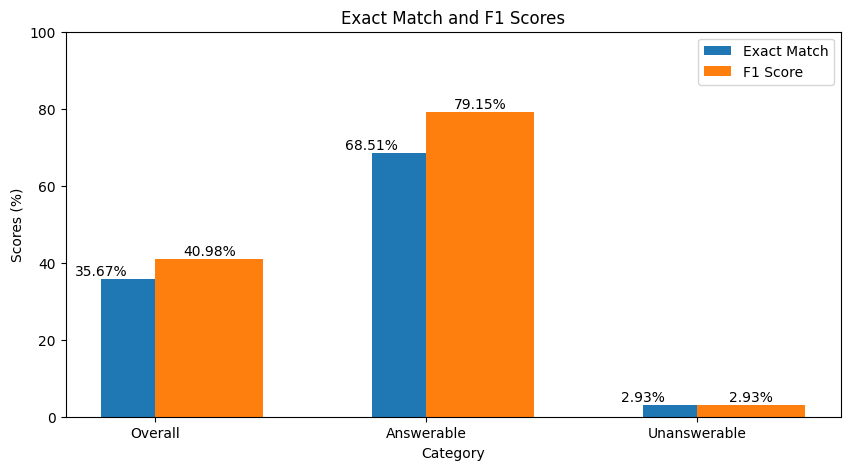

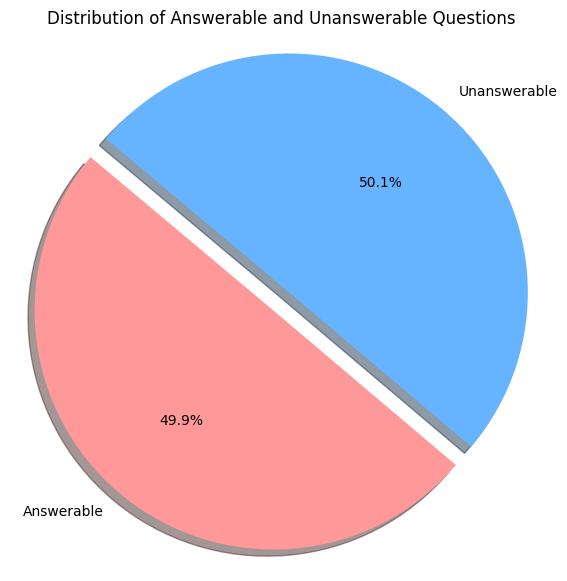

In [4]:
import matplotlib.pyplot as plt
import json

# Sample results
results = {
    "exact": 35.66916533310874,
    "f1": 40.9841072384065,
    "total": 11873,
    "HasAns_exact": 68.50539811066128,
    "HasAns_f1": 79.15052382618089,
    "HasAns_total": 5928,
    "NoAns_exact": 2.926829268292683,
    "NoAns_f1": 2.926829268292683,
    "NoAns_total": 5945
}

# Bar chart for Exact Match and F1 Scores
labels = ['Overall', 'Answerable', 'Unanswerable']
exact_scores = [results['exact'], results['HasAns_exact'], results['NoAns_exact']]
f1_scores = [results['f1'], results['HasAns_f1'], results['NoAns_f1']]

x = range(len(labels))

plt.figure(figsize=(10, 5))
plt.bar(x, exact_scores, width=0.4, label='Exact Match', align='center')
plt.bar(x, f1_scores, width=0.4, label='F1 Score', align='edge')

plt.xlabel('Category')
plt.ylabel('Scores (%)')
plt.title('Exact Match and F1 Scores')
plt.xticks(x, labels)
plt.legend()
plt.ylim(0, 100)

# Show values on bars
for i in range(len(labels)):
    plt.text(i - 0.2, exact_scores[i] + 1, f'{exact_scores[i]:.2f}%', ha='center')
    plt.text(i + 0.2, f1_scores[i] + 1, f'{f1_scores[i]:.2f}%', ha='center')

plt.show()

# Pie chart for Total Questions
labels = ['Answerable', 'Unanswerable']
sizes = [results['HasAns_total'], results['NoAns_total']]
colors = ['#ff9999','#66b3ff']
explode = (0.1, 0)  # explode 1st slice

plt.figure(figsize=(7, 7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=140)

plt.title('Distribution of Answerable and Unanswerable Questions')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


/var/folders/dc/gm62hfbx64d0f98rqwpt3s_h0000gn/T/ipykernel_88689/3032164246.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df.index, y="exact", data=df, palette="viridis")


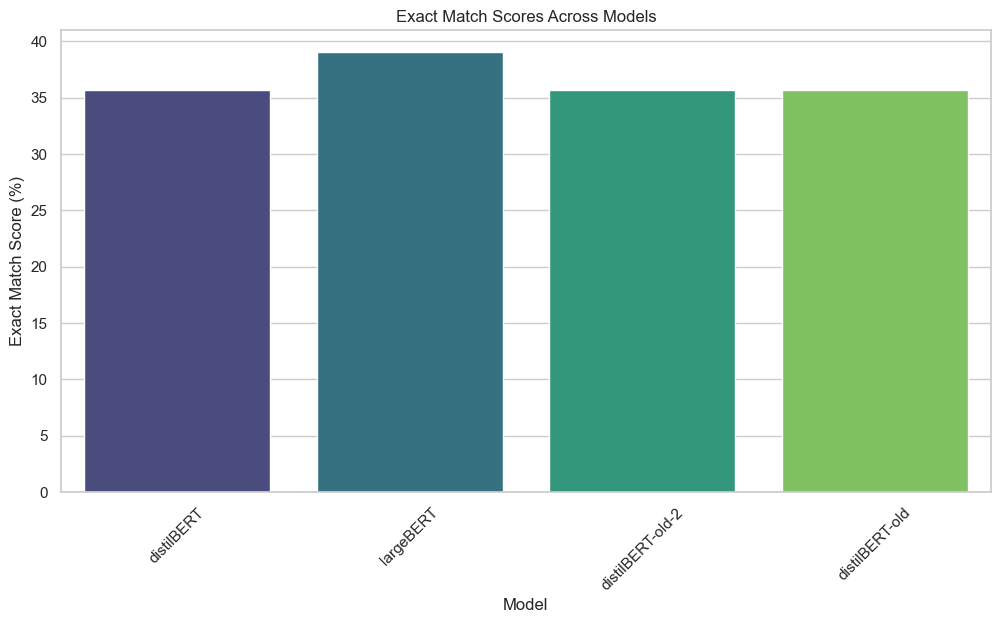

/var/folders/dc/gm62hfbx64d0f98rqwpt3s_h0000gn/T/ipykernel_88689/3032164246.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df.index, y="f1", data=df, palette="viridis")


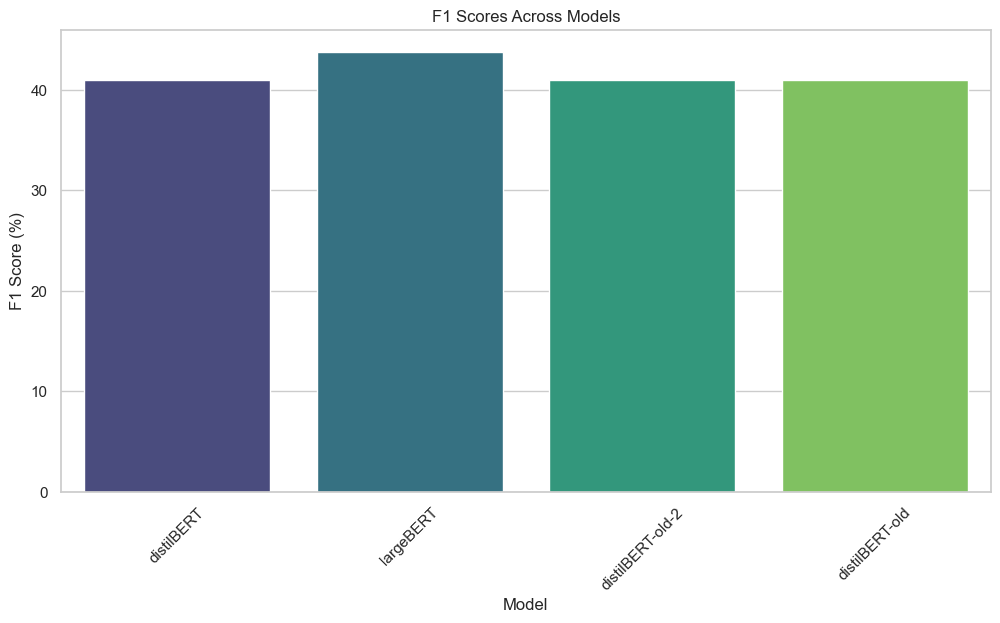

/var/folders/dc/gm62hfbx64d0f98rqwpt3s_h0000gn/T/ipykernel_88689/3032164246.py:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(df["exact"][i], df["f1"][i], df.index[i], fontsize=9, ha='right')


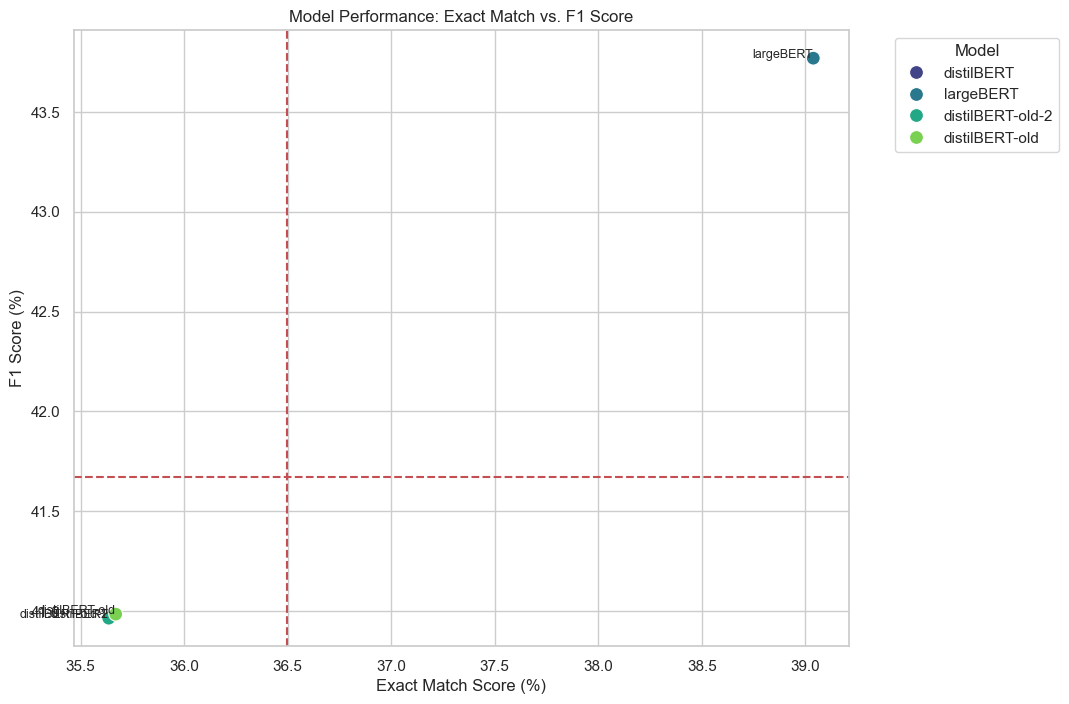

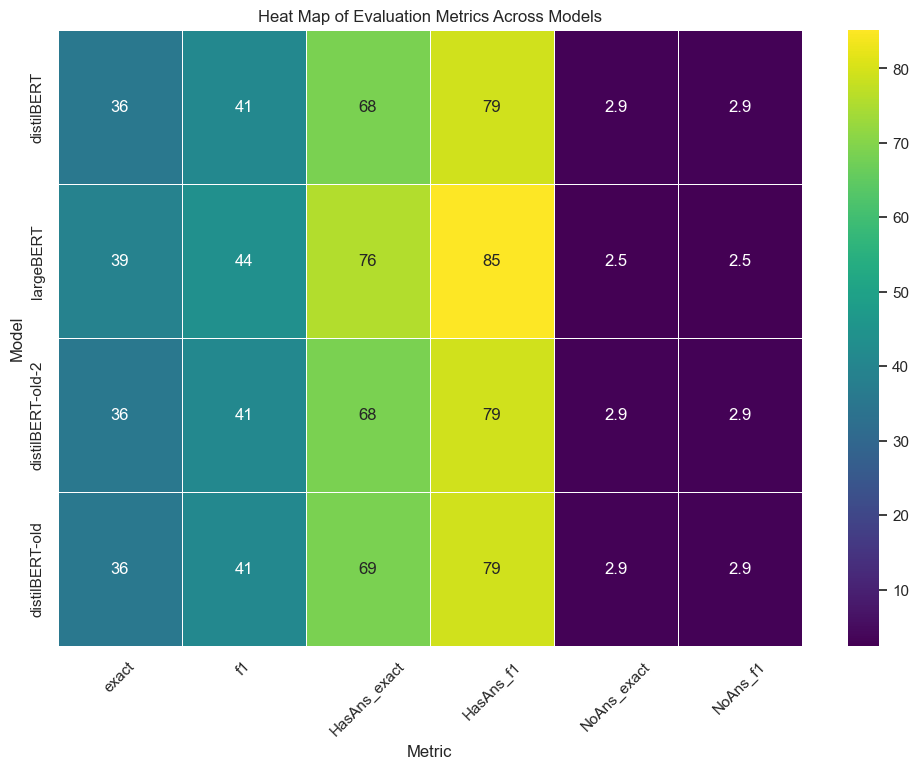

In [13]:
subprocess.check_call([sys.executable, '-m', 'pip', 'install', '--upgrade', 'pip'])
subprocess.check_call([sys.executable, '-m', 'pip', 'install', 'pandas', 'matplotlib', 'seaborn'])

import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
eval_results_dir = "./eval_results"
data = []

for filename in os.listdir(eval_results_dir):
    if filename.endswith("_eval.json"):
        model_name = filename.split("_")[0]
        with open(os.path.join(eval_results_dir, filename), "r") as f:
            results = json.load(f)
            results["model"] = model_name
            data.append(results)

df = pd.DataFrame(data)
df.set_index("model", inplace=True)

# Visualization 1: Comparison of Models Across Each Metric Independently
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.barplot(x=df.index, y="exact", data=df, palette="viridis")
plt.title("Exact Match Scores Across Models")
plt.xlabel("Model")
plt.ylabel("Exact Match Score (%)")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x=df.index, y="f1", data=df, palette="viridis")
plt.title("F1 Scores Across Models")
plt.xlabel("Model")
plt.ylabel("F1 Score (%)")
plt.xticks(rotation=45)
plt.show()

# Visualization 2: Gardner Quadrants Style
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x="exact", y="f1", hue=df.index, palette="viridis", s=100)
plt.title("Model Performance: Exact Match vs. F1 Score")
plt.xlabel("Exact Match Score (%)")
plt.ylabel("F1 Score (%)")
for i in range(df.shape[0]):
    plt.text(df["exact"][i], df["f1"][i], df.index[i], fontsize=9, ha='right')
plt.axhline(y=df["f1"].mean(), color='r', linestyle='--')
plt.axvline(x=df["exact"].mean(), color='r', linestyle='--')
plt.grid(True)
plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Visualization 3: Heat Map of Evaluation Metrics
metrics = ["exact", "f1", "HasAns_exact", "HasAns_f1", "NoAns_exact", "NoAns_f1"]

plt.figure(figsize=(12, 8))
sns.heatmap(df[metrics], annot=True, cmap="viridis", cbar=True, linewidths=.5)
plt.title("Heat Map of Evaluation Metrics Across Models")
plt.xlabel("Metric")
plt.ylabel("Model")
plt.xticks(rotation=45)
plt.show()


## ==================================================================================================================================

## Model Results

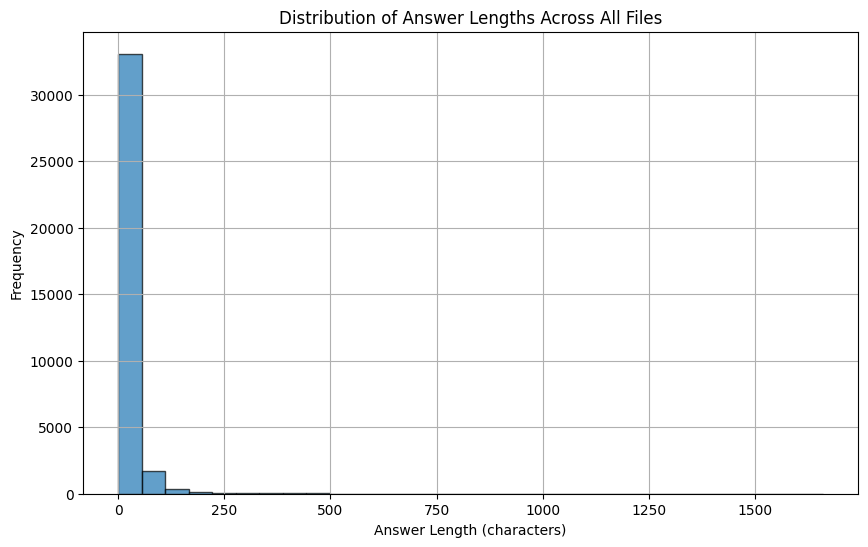

In [22]:
# NOTE: 
# I've been checking the distribution of answer lenghts for 
# fine-tuned models to make a feasible yet sufficiently high assumption
# on max_new_tokens (answer length) in base.py
# --> 250 seems sufficient here for the majority of questions
import utils

# Add directory to Python path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), 'scripts', 'utils')))

utils.plot_answer_length_distribution('model_results/tuned')

In [ ]:
import os
import json
import numpy as np

# Manual dictionary for model names
manual_model_name_map = {
    # base SQuAD
    'Llama3-ChatQA-1.5-8B': 'llama3-8b\n(8B)', 
    'falcon-7b-instruct': 'falcon-7b\n(7B)',
    
    # tuned: SQuAD
    'bert-large-cased-whole-word-masking-finetuned-squad': 'largeBERT\n(336M)',
    'distilbert-base-cased-distilled-squad': 'distilBERT\n(65M)',
    'mdeberta-v3-base-squad2': 'mdeBERTa\n(278M)',
    'roberta-base-squad2': 'roBERTa_base\n(124M)',
    'roberta-large-squad2': 'roBERTa_large\n(354M)',
    'xlm-roberta-base-squad2': 'xlm_roBERTa_base\n(277M)', 
    
    # Gtuned: SQuAD
    'bert-multi-english-german-squad2': 'multilang_BERT\n(177M)', 
    'gelectra-base-germanquad-distilled': 'Ger_Electra_distilled\n(109M)', 
    'gelectra-base-germanquad': 'Ger_Electra_base\n(109M)', 
    'gelectra-large-germanquad': 'Ger_Electra_large\n(335M)', 
}

# Function to load json files and extract relevant information
def load_json_files(base_dir, subdirs):
    results = []
    model_name_map = {}
    for subdir in subdirs:
        subdir_path = os.path.join(base_dir, subdir)
        for file_name in os.listdir(subdir_path):
            if file_name.endswith('_eval_results.json'):
                with open(os.path.join(subdir_path, file_name), 'r') as f:
                    data = json.load(f)
                    
                    # Model Name
                    model_name = file_name.replace('_eval_results.json', '')
                    short_name = manual_model_name_map.get(model_name, model_name.split('-')[0])
                    model_name_map[short_name] = model_name
                    
                    # Evaluation script for SQuAD v2 / GermanQuAD
                    eval_v2 = data.get('evaluate-v2', {})
                    exact = eval_v2.get('exact', 0) / 100  # Rescale to 0-1
                    f1 = eval_v2.get('f1', 0) / 100  # Rescale to 0-1
                    
                    # HasAns metrics
                    has_ans_exact = eval_v2.get('HasAns_exact', 0) / 100
                    has_ans_f1 = eval_v2.get('HasAns_f1', 0) / 100
                    
                    # NoAns metrics
                    no_ans_exact = eval_v2.get('NoAns_exact', 0)
                    no_ans_f1 = eval_v2.get('NoAns_f1', 0)
                    
                    # BLEU 
                    bleu_score = data.get('bleu', {}).get('bleu', 0)
                    
                    # ROUGE
                    rouge_scores = data.get('rouge', {})
                    rouge1 = rouge_scores.get('rouge1', {}).get('f', 0)
                    rouge2 = rouge_scores.get('rouge2', {}).get('f', 0)
                    rougeL = rouge_scores.get('rougeL', {}).get('f', 0)
                    rouge_score = np.mean([rouge1, rouge2, rougeL])
                    
                    # BERT
                    bert_score = data.get('bertscore', {}).get('F1', 0)
                    
                    # Cumulative scores 
                    eval_v2_score = 1/2 * (exact + f1)
                    eval_v2_score_hasAns =  1/2 * (has_ans_exact + has_ans_f1)
                    eval_other = 1/3 * (bert_score + bleu_score + rouge_score)
                    overall_score = 1/2 * (eval_v2_score + eval_other)
                    
                    results.append({
                        'short_name': short_name,
                        'model': model_name,
                        'exact': exact,
                        'f1': f1,
                        'has_ans_exact': has_ans_exact,
                        'has_ans_f1': has_ans_f1,
                        'no_ans_exact': no_ans_exact,
                        'no_ans_f1': no_ans_f1,
                        'bleu_score': bleu_score,
                        'rouge_score': rouge_score,
                        'bert_score': bert_score,
                        'eval_v2_score': eval_v2_score,
                        'eval_v2_score_hasAns': eval_v2_score_hasAns, 
                        'eval_other': eval_other,
                        'overall_score': overall_score
                    })
    return results, model_name_map

,short_name,model,exact,f1,has_ans_exact,has_ans_f1,no_ans_exact,no_ans_f1,bleu_score,rouge_score,bert_score,eval_v2_score,eval_v2_score_hasAns,eval_other,overall_score
0,roBERTa_base\n(124M),roberta-base-squad2,0.421039,0.456717,0.842949,0.914406,0.033642,0.033642,0.375638,0.360817,0.479193,0.438878,0.878677,0.405216,0.422047
1,distilBERT\n(65M),distilbert-base-cased-distilled-squad,0.362335,0.410843,0.703779,0.800935,2.186712,2.186712,0.337249,0.338309,0.465557,0.386589,0.752357,0.380371,0.383480
2,mdeBERTa\n(278M),mdeberta-v3-base-squad2,0.397372,0.428691,0.787787,0.850514,0.807401,0.807401,0.350979,0.337773,0.468951,0.413032,0.819150,0.385901,0.399466
3,largeBERT\n(336M),bert-large-cased-whole-word-masking-finetuned-...,0.399815,0.444165,0.771930,0.860758,2.876367,2.876367,0.365832,0.365351,0.474704,0.421990,0.816344,0.401963,0.411976
4,llama3-8b\n(8B),Llama3-ChatQA-1.5-8B,0.147225,0.266115,0.281883,0.520003,1.295206,1.295206,0.185775,0.203021,0.440757,0.206670,0.400943,0.276518,0.241594
5,roBERTa_large\n(354M),roberta-large-squad2,0.428620,0.465948,0.853576,0.928340,0.487805,0.487805,0.381850,0.367995,0.480267,0.447284,0.890958,0.410037,0.428661
6,falcon-7b\n(7B),falcon-7b-instruct,0.055504,0.113179,0.095648,0.211163,1.547519,1.547519,0.082135,0.080342,0.420655,0.084342,0.153406,0.194377,0.139359


,Short Name,Full Name
0,roBERTa_base\n(124M),roberta-base-squad2
1,distilBERT\n(65M),distilbert-base-cased-distilled-squad
2,mdeBERTa\n(278M),mdeberta-v3-base-squad2
3,largeBERT\n(336M),bert-large-cased-whole-word-masking-finetuned-...
4,llama3-8b\n(8B),Llama3-ChatQA-1.5-8B
5,roBERTa_large\n(354M),roberta-large-squad2
6,falcon-7b\n(7B),falcon-7b-instruct


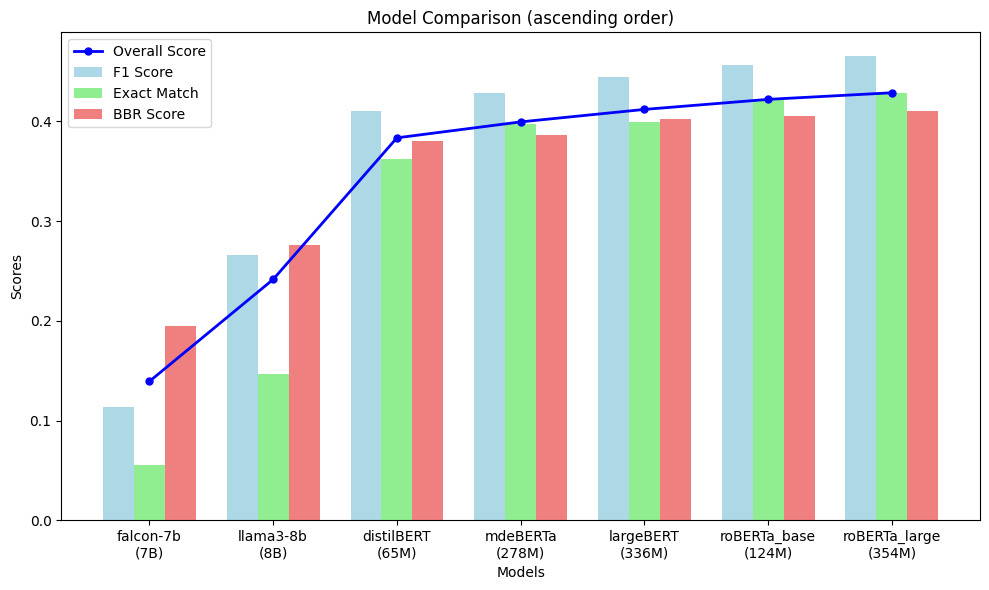

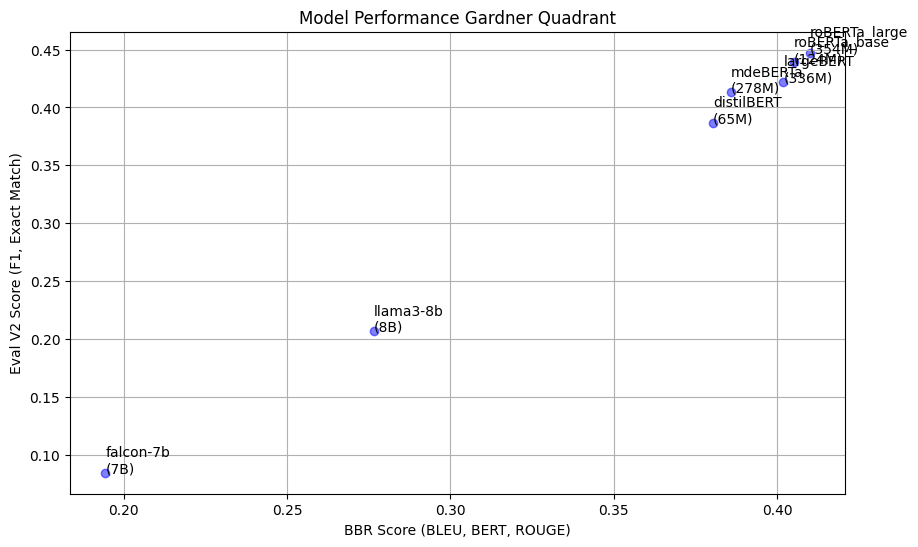

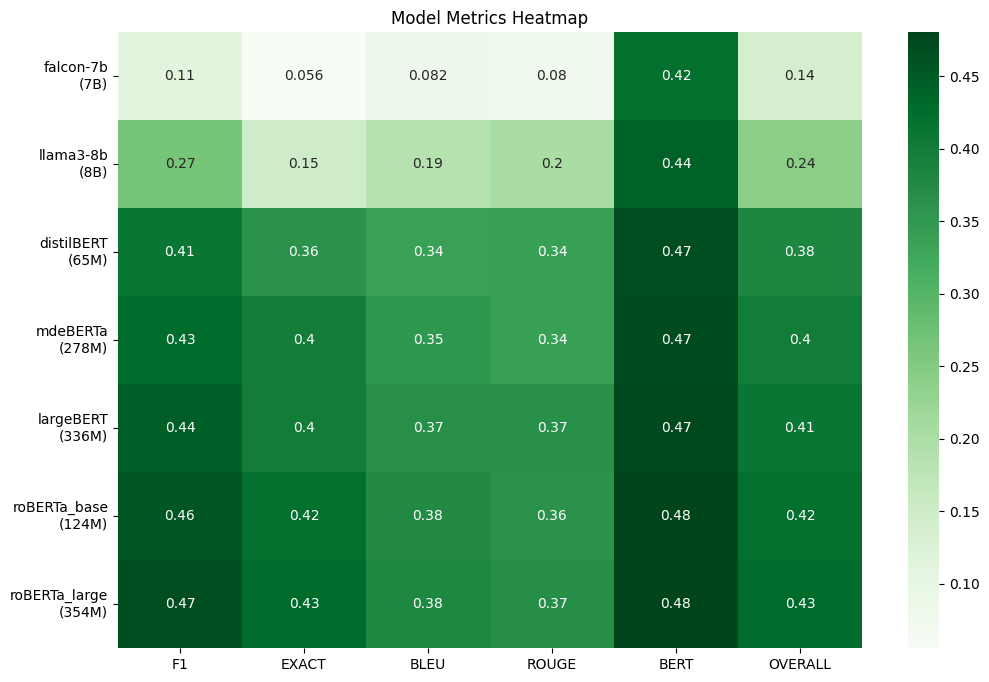

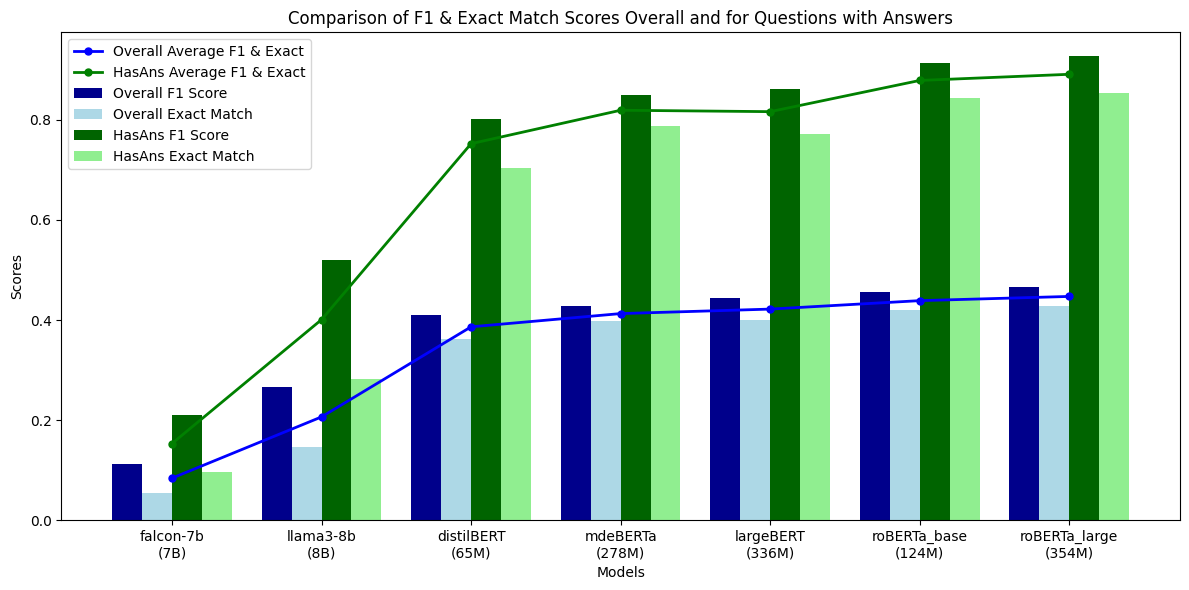

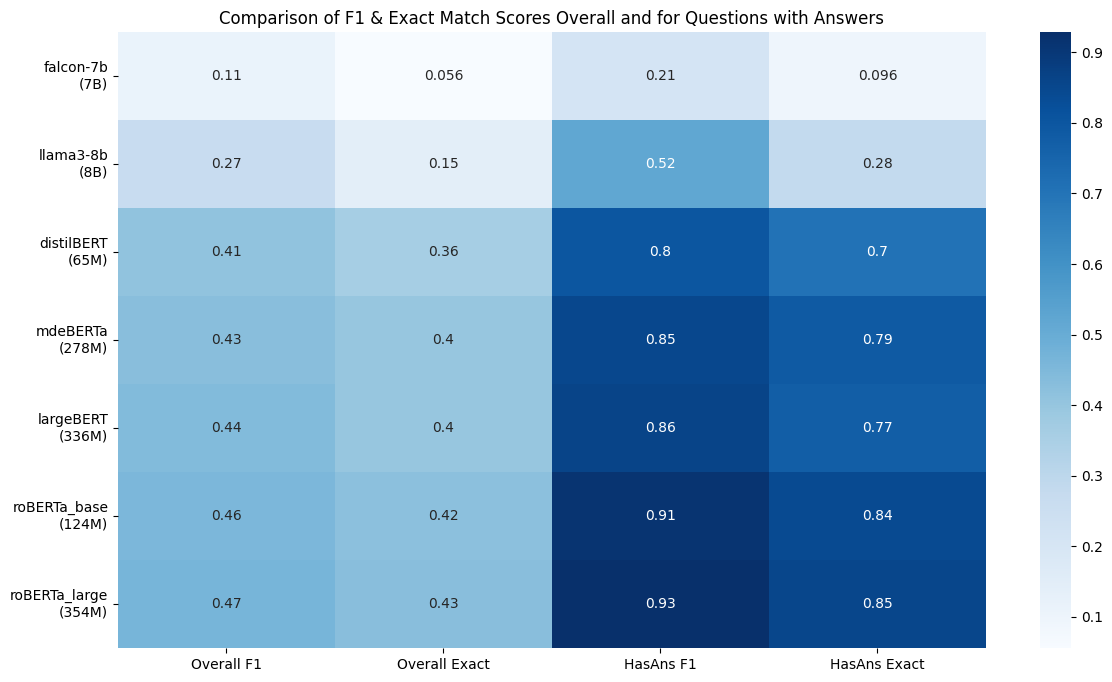

In [37]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define the directory paths
base_dir = './eval_results'
figure_root = './figures'

# Select the subdirectory
subdir = ['tuned', 'Gtuned'] # options: base, Gbase, tuned, Gtuned

# Load data
data, model_name_map = load_json_files(base_dir, subdir)

# Create and display DataFrame
from IPython.display import display
df = pd.DataFrame(data)
df_sorted = df.sort_values(by='overall_score')
display(df_sorted)
display(pd.DataFrame(list(model_name_map.items()), columns=['Short Name', 'Full Name']))

# ============================================================================================
# Visualisation 1: Bar chart with line graph for overall_score
plt.figure(figsize=(10, 6))
bar_width = 0.25
index = np.arange(len(df_sorted))

# Bar chart for F1 Score, Exact Match, and Eval Other with subtle colors
plt.bar(index, df_sorted['f1'], bar_width, label='F1 Score', color='lightblue')
plt.bar(index + bar_width, df_sorted['exact'], bar_width, label='Exact Match', color='lightgreen')
plt.bar(index + 2 * bar_width, df_sorted['eval_other'], bar_width, label='BBR Score', color='lightcoral')

# Line graph for Overall Score with a subtle color
plt.plot(index + bar_width, df_sorted['overall_score'], color='blue', marker='o', linestyle='-', linewidth=2, markersize=5, label='Overall Score')

plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Model Comparison (ascending order)')
plt.xticks(index + bar_width, [manual_model_name_map.get(name, name) for name in df_sorted['short_name']], rotation=0)
plt.legend()

plt.tight_layout()

# SAVE ⬇️
save_path = os.path.join(figure_root, 'overall-bar-chart.png')
plt.savefig(save_path)

plt.show()

# ============================================================================================
# Visualisation 2: Gardner Quadrants Style graph
plt.figure(figsize=(10, 6))
plt.scatter(df_sorted['eval_other'], df_sorted['eval_v2_score'], c='b', alpha=0.5)
for i, txt in enumerate(df_sorted['short_name']):
    plt.annotate(manual_model_name_map.get(txt, txt), (df_sorted['eval_other'].iat[i], df_sorted['eval_v2_score'].iat[i]))

plt.xlabel('BBR Score (BLEU, BERT, ROUGE)')
plt.ylabel('Eval V2 Score (F1, Exact Match)')
plt.title('Model Performance Gardner Quadrant')

plt.grid(True)

# SAVE ⬇️
save_path = os.path.join(figure_root, 'overall-gardner.png')
plt.savefig(save_path)

plt.show()

# ============================================================================================
# Visualisation 3: Heat map
plt.figure(figsize=(12, 8))

# Select and rename the columns for the heatmap
heat_data = df_sorted[['short_name', 'f1', 'exact', 'bleu_score', 'rouge_score', 'bert_score', 'overall_score']].set_index('short_name')
heat_data.columns = [col.split('_')[0].upper() for col in heat_data.columns]
# Update index labels with manual model name map
heat_data.index = [manual_model_name_map.get(name, name) for name in heat_data.index]
# Create the heatmap
sns.heatmap(heat_data, annot=True, cmap='Greens')

plt.title('Model Metrics Heatmap')

# SAVE ⬇️
save_path = os.path.join(figure_root, 'overall-heatmap.png')
plt.savefig(save_path)

plt.show()

# ============================================================================================
# Visualisation 4: Bar chart to compare overall exact and f1 with HasAns exact and f1
df_sorted = df.sort_values(by='overall_score')
plt.figure(figsize=(12, 6))
bar_width = 0.2
index = np.arange(len(df_sorted))

# Bar chart for Overall F1 Score, Overall Exact Match, HasAns F1 Score, and HasAns Exact Match with subtle colors
plt.bar(index, df_sorted['f1'], bar_width, label='Overall F1 Score', color='darkblue')
plt.bar(index + bar_width, df_sorted['exact'], bar_width, label='Overall Exact Match', color='lightblue')
plt.bar(index + 2 * bar_width, df_sorted['has_ans_f1'], bar_width, label='HasAns F1 Score', color='darkgreen')
plt.bar(index + 3 * bar_width, df_sorted['has_ans_exact'], bar_width, label='HasAns Exact Match', color='lightgreen')

# Calculate eval_v2_score and eval_v2_score_hasAns
df_sorted['eval_v2_score'] = 0.5 * (df_sorted['exact'] + df_sorted['f1'])
df_sorted['eval_v2_score_hasAns'] = 0.5 * (df_sorted['has_ans_exact'] + df_sorted['has_ans_f1'])

# Plot lines for eval_v2_score and eval_v2_score_hasAns
plt.plot(index + 1.5 * bar_width, df_sorted['eval_v2_score'], color='blue', marker='o', linestyle='-', linewidth=2, markersize=5, label='Overall Average F1 & Exact')
plt.plot(index + 1.5 * bar_width, df_sorted['eval_v2_score_hasAns'], color='green', marker='o', linestyle='-', linewidth=2, markersize=5, label='HasAns Average F1 & Exact')

plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Comparison of F1 & Exact Match Scores Overall and for Questions with Answers')
plt.xticks(index + 1.5 * bar_width, [manual_model_name_map.get(name, name) for name in df_sorted['short_name']], rotation=0)
plt.legend()

plt.tight_layout()

# SAVE ⬇️
save_path = os.path.join(figure_root, 'evaluate-v2-bar-chart.png')
plt.savefig(save_path)

plt.show()

# ============================================================================================
# Visualisation 5: Heat map to compare overall exact and f1 with HasAns exact and f1
plt.figure(figsize=(14, 8))

# Select and rename the columns for the heatmap
heat_data_comparison = df_sorted[['short_name', 'f1', 'exact', 'has_ans_f1', 'has_ans_exact']].set_index('short_name')
heat_data_comparison.columns = ['Overall F1', 'Overall Exact', 'HasAns F1', 'HasAns Exact']

# Update index labels with manual model name map
heat_data_comparison.index = [manual_model_name_map.get(name, name) for name in heat_data_comparison.index]

# Create the heatmap
sns.heatmap(heat_data_comparison, annot=True, cmap='Blues')

plt.title('Comparison of F1 & Exact Match Scores Overall and for Questions with Answers')

# SAVE ⬇️
save_path = os.path.join(figure_root, 'evaluate-v2-heatmap.png')
plt.savefig(save_path)

plt.show()